# The Battle of Neighborhoods

## Chicago, Northbrook, or Naperville?

### Project Report

#### Project Description:

For midclass who move to Chicago, they will always ask themselves questions about where should they live? The downtown area? The north suburb Northbrook? Or the west suburb Naperville? People usually work in downtown, so live in town will give them lots of conveniences such as easy commute and the quick access to tons of museums, etc., but they have to pay a very high price for the crowded apartment. Of course, they can buy the big house in the suburb area, such as Northbrook and Naperville, two of the most welcomed township by the middle class. How similar are those neighborhoods? What other attributes should we consider further to make the final conclusion?

In this project, we explored those problems and hope that we can find solution for people based on the housing availability, house price, median income level, nearby facilities, and in sum rating scores. Specifically, we selected 14 downtown neighborhoods and one neighborhood of Naperville and neighborhood of Northbrook. Then, by applying the 'uszipcode' package, we got the coordinates, total housing units, occupied housing units, median home value, and median household income information for each neighborhood. After that, we used the Foursquare API to get the most common venues for each region. After converting the most common venues data into dummies, we applied the unsupervised machine learning K-means algorithm to grouped the neighborhoods into 5 clusters to explore the similarities among neighborhoods. Finally, we scraped ranking data from areavibes.com for the city of Chicago, Northbrook, and Naperville to conclude the best living area among the three. 


### Data Section

Generally, my data comes from four different scources:
1. Downtown Chicago neighborhoods basic information:https://www.seechicagorealestate.com/chicago-zip-codes-by-neighborhood.php
1. Neighborhood demographic information data: uszipcode package
1. Most popular venues data: Foursquare API
1. City livability ranking data: https://www.areavibes.com/

In [1]:
import numpy as np # library to handle data in a vectorized manner
import geopy
import pandas as pd # library for data analsysis
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import requests # library to handle requests
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [2]:
df=pd.read_csv('chicago_data1.csv')
df

,Zipcode,Neighborhood,Area
0,60601,New East Side,Downtown
1,60604,Loop,Downtown
2,60605,Central Station,Downtown
3,60606,Near West Side,Downtown
4,60607,West Loop,Downtown
5,60610,Old Town,Downtown
6,60611,Magnificent Mile,Downtown
7,60612,Tri-Taylor,Downtown
8,60616,South Loop,Downtown
9,60622,Noble Square,Downtown


In [3]:
df.shape

(16, 3)

In [4]:
df['Latitude'] =" "
df['Longitude'] = " "
df['Housing_units']=" "
df['Occupied_housing_units']=" "
df['Median_home_value']=" "
df['Median_household_income']=" "
df.head()

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income
0,60601,New East Side,Downtown,,,,,,
1,60604,Loop,Downtown,,,,,,
2,60605,Central Station,Downtown,,,,,,
3,60606,Near West Side,Downtown,,,,,,
4,60607,West Loop,Downtown,,,,,,


In [8]:
!pip install uszipcode
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [10]:
for i in range(0,len(df)):
    zipcode = search.by_zipcode(df['Zipcode'][i])
    df['Latitude'][i] = zipcode.lat
    df['Longitude'][i] = zipcode.lng
    df['Housing_units'][i] = zipcode.housing_units
    df['Occupied_housing_units'][i] = zipcode.occupied_housing_units
    df['Median_home_value'][i]=zipcode.median_home_value
    df['Median_household_income'][i]=zipcode.median_household_income

C:\Users\luoyi\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\luoyi\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\luoyi\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\luoyi\Anaco

In [11]:
df

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income
0,60601,New East Side,Downtown,41.88,-87.62,8594,6739,494200,95556
1,60604,Loop,Downtown,41.88,-87.625,496,358,528100,132188
2,60605,Central Station,Downtown,41.87,-87.62,14805,12703,344300,75426
3,60606,Near West Side,Downtown,41.882,-87.637,2022,1481,338800,109324
4,60607,West Loop,Downtown,41.87,-87.65,13356,11497,340000,80261
5,60610,Old Town,Downtown,41.9,-87.64,26614,23055,396600,72636
6,60611,Magnificent Mile,Downtown,41.91,-87.61,24211,18975,464400,85642
7,60612,Tri-Taylor,Downtown,41.88,-87.69,15513,13070,254200,35318
8,60616,South Loop,Downtown,41.84,-87.62,25198,21421,288100,44258
9,60622,Noble Square,Downtown,41.9,-87.69,26433,24124,412000,68923


In [12]:
# Magnificent Mile coordinates have been set on the lake of michigen, so we reset it 
chicago_data = df.copy()
chicago_data['Latitude'][6]=41.896
chicago_data['Longitude'][6]=-87.620
chicago_data

C:\Users\luoyi\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\luoyi\Anaconda3.0\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income
0,60601,New East Side,Downtown,41.88,-87.62,8594,6739,494200,95556
1,60604,Loop,Downtown,41.88,-87.625,496,358,528100,132188
2,60605,Central Station,Downtown,41.87,-87.62,14805,12703,344300,75426
3,60606,Near West Side,Downtown,41.882,-87.637,2022,1481,338800,109324
4,60607,West Loop,Downtown,41.87,-87.65,13356,11497,340000,80261
5,60610,Old Town,Downtown,41.9,-87.64,26614,23055,396600,72636
6,60611,Magnificent Mile,Downtown,41.896,-87.62,24211,18975,464400,85642
7,60612,Tri-Taylor,Downtown,41.88,-87.69,15513,13070,254200,35318
8,60616,South Loop,Downtown,41.84,-87.62,25198,21421,288100,44258
9,60622,Noble Square,Downtown,41.9,-87.69,26433,24124,412000,68923


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

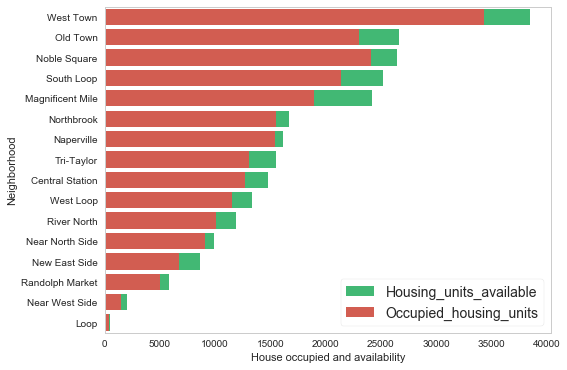

In [14]:
f, ax = plt.subplots(figsize=(8,6))

neighbor = chicago_data.sort_values(["Housing_units"], ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=neighbor["Housing_units"],y=neighbor["Neighborhood"],data=neighbor,label="Housing_units_available",color="#2ecc71")

sns.set_color_codes("muted")
sns.barplot(x=neighbor["Occupied_housing_units"],y=neighbor["Neighborhood"],data=neighbor,label="Occupied_housing_units",color="#e74c3c")

ax.legend(loc="lower right",frameon=True,fontsize=14)
ax.set(ylabel="Neighborhood",xlabel="House occupied and availability")
ax.grid(False)

As we noticed from the figure above that the housing availability is very tight in Northbrook and Naperville, but highly different among downtown neighborhoods. This somehow proved that Northbrook and Naperville are very popular place to live. 

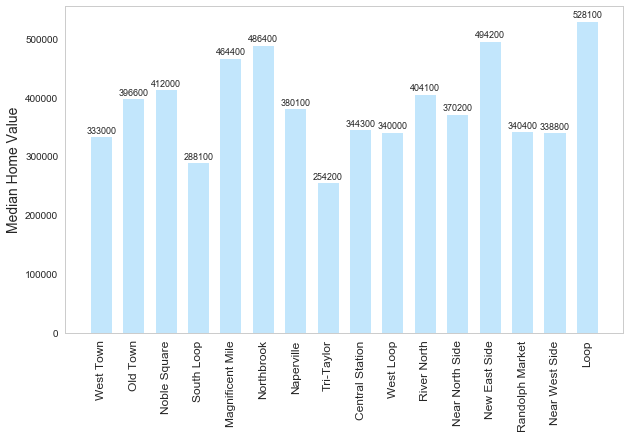

In [15]:
plt.figure(figsize=(10,6))
plt.bar(neighbor["Neighborhood"], neighbor["Median_home_value"],width=0.65,facecolor='lightskyblue',alpha=0.5)
plt.ylabel("Median Home Value",fontsize=14)
plt.xticks(rotation="vertical",fontsize=12)
plt.grid(False)

for a,b in zip(neighbor["Neighborhood"],neighbor["Median_home_value"]):

    plt.text(a, 1.01*b, '%.0f' % b, ha='center', va= 'bottom',fontsize=9)

For the median house price, the loop area is the most expensive place, and the price is highly different among downtown neighborhood, for example, the median price in Tri-Taylor is only \$254,200. The median house price in Northbrook is \$486,400 which is higher than the \$380,100 median price at Naperville. The price shows another support for Naperville.

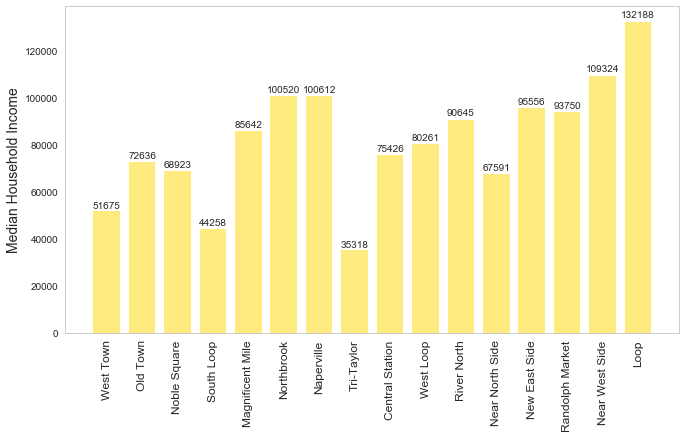

In [16]:
plt.figure(figsize=(11,6))
plt.bar(neighbor["Neighborhood"], neighbor["Median_household_income"],width=0.75,facecolor='gold',align='center',alpha=0.5)
plt.ylabel("Median Household Income",fontsize=14)
plt.xticks(rotation="vertical",fontsize=12)
plt.grid(False)

for a,b in zip(neighbor["Neighborhood"],neighbor["Median_household_income"]):

    plt.text(a, 1.01*b, '%.0f' % b, ha='center', va= 'bottom',fontsize=10)

The household median income in Loop area is the highest and the income level for Naperville and Northbrook are in par.

In [17]:
# import geocoder
address = 'Chicago, IL'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

C:\Users\luoyi\Anaconda3.0\lib\site-packages\geopy\geocoders\osm.py:138: UserWarning: Using Nominatim with the default "geopy/1.16.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [18]:
# create map of Chicago using latitude and longitude values
map_dt_chicago = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(chicago_data['Latitude'], chicago_data['Longitude'], chicago_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dt_chicago)  
    
map_dt_chicago

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'WWV5W2QNUMOTYBSRQEACG5TNMN0RTRMFCOOFE5PIDMQ5KNHH' # your Foursquare ID
CLIENT_SECRET = 'PTLD0A0D4RZTPQQPTP1LMXRSALRIYOF2BFUYP4ZEUX0LC5JQ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WWV5W2QNUMOTYBSRQEACG5TNMN0RTRMFCOOFE5PIDMQ5KNHH
CLIENT_SECRET:PTLD0A0D4RZTPQQPTP1LMXRSALRIYOF2BFUYP4ZEUX0LC5JQ


#### Let's explore the first neighborhood in our dataframe.

In [20]:
chicago_data.loc[0, 'Neighborhood']

'New East Side'

In [21]:
neighborhood_latitude = chicago_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = chicago_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = chicago_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of New East Side are 41.88, -87.62.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [22]:
# type your answer here

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WWV5W2QNUMOTYBSRQEACG5TNMN0RTRMFCOOFE5PIDMQ5KNHH&client_secret=PTLD0A0D4RZTPQQPTP1LMXRSALRIYOF2BFUYP4ZEUX0LC5JQ&v=20180605&ll=41.88,-87.62&radius=500&limit=100'

In [23]:
results = requests.get(url).json()

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [25]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Grant Park - Butler Field,Park,41.879600,-87.619604
1,Art Institute of Chicago Museum Shop,Gift Shop,41.880654,-87.622227
2,The Modern Wing,Art Gallery,41.880365,-87.622227
3,Lurie Garden,Garden,41.881494,-87.621783
4,Lakefront Trail,Trail,41.880953,-87.617112


### And how many venues were returned by Foursquare?

In [26]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

72 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Chicago Area

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called chicago_venues.

In [28]:
chicago_venues = getNearbyVenues(names=chicago_data['Neighborhood'],
                                   latitudes=chicago_data['Latitude'],
                                   longitudes=chicago_data['Longitude']
                                  )

New East Side
Loop
Central Station
Near West Side
West Loop
Old Town
Magnificent Mile
Tri-Taylor
South Loop
Noble Square
Near North Side
West Town
River North
Randolph Market
Naperville
Northbrook


In [29]:
print(chicago_venues.shape)
chicago_venues.head()

(781, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New East Side,41.88,-87.62,Grant Park - Butler Field,41.879600,-87.619604,Park
1,New East Side,41.88,-87.62,Art Institute of Chicago Museum Shop,41.880654,-87.622227,Gift Shop
2,New East Side,41.88,-87.62,The Modern Wing,41.880365,-87.622227,Art Gallery
3,New East Side,41.88,-87.62,Lurie Garden,41.881494,-87.621783,Garden
4,New East Side,41.88,-87.62,Lakefront Trail,41.880953,-87.617112,Trail


Let's find out how many unique categories can be curated from all the returned venues

In [30]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 182 uniques categories.


## 3. Analyze Each Neighborhood


In [31]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,New East Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New East Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New East Side,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,New East Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New East Side,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
chicago_onehot.shape

(781, 183)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Trail,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Central Station,0.00,0.00,0.027027,0.027027,0.000000,0.000000,0.000000,0.027027,0.027027,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
1,Loop,0.00,0.01,0.020000,0.010000,0.000000,0.020000,0.020000,0.010000,0.000000,...,0.000000,0.010000,0.000000,0.010000,0.00,0.01,0.00,0.000000,0.00,0.000000
2,Magnificent Mile,0.01,0.01,0.110000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.01,0.000000,0.02,0.010000
3,Naperville,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
4,Near North Side,0.00,0.00,0.000000,0.000000,0.000000,0.153846,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.076923,0.00,0.000000
5,Near West Side,0.00,0.00,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.020000,0.01,0.00,0.01,0.000000,0.00,0.000000
6,New East Side,0.00,0.00,0.027778,0.013889,0.000000,0.027778,0.027778,0.000000,0.000000,...,0.027778,0.013889,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
7,Noble Square,0.00,0.00,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.046512,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
8,Northbrook,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000
9,Old Town,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.068966


In [34]:
chicago_grouped.shape

(16, 183)

#### Let's print each neighborhood along with the top 5 most common venues

In [35]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Central Station----
              venue  freq
0    History Museum  0.24
1              Park  0.05
2     Historic Site  0.05
3            Museum  0.05
4  Sushi Restaurant  0.03


----Loop----
                venue  freq
0         Coffee Shop  0.08
1      Sandwich Place  0.05
2  Italian Restaurant  0.04
3              Bakery  0.04
4             Theater  0.03


----Magnificent Mile----
                     venue  freq
0      American Restaurant  0.11
1                    Hotel  0.07
2           Clothing Store  0.06
3               Restaurant  0.04
4  New American Restaurant  0.03


----Naperville----
               venue  freq
0          Speakeasy   0.5
1  College Cafeteria   0.5
2  Accessories Store   0.0
3  Polish Restaurant   0.0
4               Park   0.0


----Near North Side----
            venue  freq
0             Bar  0.15
1     Art Gallery  0.15
2          Bakery  0.08
3            Park  0.08
4  Clothing Store  0.08


----Near West Side----
                      venue  freq


#### Let's put that into a *pandas* dataframe
First, let's write a function to sort the venues in descending order.

In [36]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [37]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Station,History Museum,Park,Museum,Historic Site,Spa,Gym / Fitness Center,Food Truck,Burger Joint,Cocktail Bar,Gift Shop
1,Loop,Coffee Shop,Sandwich Place,Italian Restaurant,Bakery,Theater,Museum,Café,Performing Arts Venue,Middle Eastern Restaurant,Burger Joint
2,Magnificent Mile,American Restaurant,Hotel,Clothing Store,Restaurant,Cosmetics Shop,Pizza Place,New American Restaurant,Spa,Lingerie Store,Women's Store
3,Naperville,Speakeasy,College Cafeteria,Yoga Studio,Fast Food Restaurant,Gas Station,Garden,Fried Chicken Joint,French Restaurant,Fountain,Food Truck
4,Near North Side,Bar,Art Gallery,Bakery,Thai Restaurant,Sushi Restaurant,History Museum,Park,Boat or Ferry,Clothing Store,Café
5,Near West Side,Sandwich Place,Coffee Shop,Mediterranean Restaurant,Donut Shop,Hotel,Food Truck,Italian Restaurant,BBQ Joint,American Restaurant,Gym
6,New East Side,Coffee Shop,Park,Bakery,Italian Restaurant,Garden,Music Venue,Sandwich Place,Museum,Boat or Ferry,Fountain
7,Noble Square,Sandwich Place,Bar,Dive Bar,Ukrainian Restaurant,Latin American Restaurant,Mexican Restaurant,Taco Place,Coffee Shop,Caribbean Restaurant,Bus Station
8,Northbrook,Park,Yoga Studio,German Restaurant,Gas Station,Garden,Fried Chicken Joint,French Restaurant,Fountain,Food Truck,Food Court
9,Old Town,Lounge,Yoga Studio,Coffee Shop,Gym,Bike Rental / Bike Share,Fast Food Restaurant,Sandwich Place,Deli / Bodega,Diner,Eastern European Restaurant


## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [38]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 2, 4, 0, 0, 0, 1, 0])

In [39]:
chicago_grouped_clustering.head()

,Accessories Store,African Restaurant,American Restaurant,Amphitheater,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Trail,Train Station,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,0.00,0.00,0.027027,0.027027,0.0,0.000000,0.00,0.027027,0.027027,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.00
1,0.00,0.01,0.020000,0.010000,0.0,0.020000,0.02,0.010000,0.000000,0.02,...,0.0,0.01,0.0,0.01,0.0,0.01,0.00,0.000000,0.00,0.00
2,0.01,0.01,0.110000,0.000000,0.0,0.000000,0.01,0.000000,0.000000,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.01,0.000000,0.02,0.01
3,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.000000,0.00,0.00
4,0.00,0.00,0.000000,0.000000,0.0,0.153846,0.00,0.000000,0.000000,0.00,...,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.076923,0.00,0.00


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [40]:
chicago_merged = chicago_data

# add clustering labels
chicago_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
chicago_merged = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

chicago_merged.head() # check the last columns!

,Zipcode,Neighborhood,Area,Latitude,Longitude,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,60601,New East Side,Downtown,41.88,-87.62,8594,6739,494200,95556,0,Coffee Shop,Park,Bakery,Italian Restaurant,Garden,Music Venue,Sandwich Place,Museum,Boat or Ferry,Fountain
1,60604,Loop,Downtown,41.88,-87.625,496,358,528100,132188,0,Coffee Shop,Sandwich Place,Italian Restaurant,Bakery,Theater,Museum,Café,Performing Arts Venue,Middle Eastern Restaurant,Burger Joint
2,60605,Central Station,Downtown,41.87,-87.62,14805,12703,344300,75426,0,History Museum,Park,Museum,Historic Site,Spa,Gym / Fitness Center,Food Truck,Burger Joint,Cocktail Bar,Gift Shop
3,60606,Near West Side,Downtown,41.882,-87.637,2022,1481,338800,109324,2,Sandwich Place,Coffee Shop,Mediterranean Restaurant,Donut Shop,Hotel,Food Truck,Italian Restaurant,BBQ Joint,American Restaurant,Gym
4,60607,West Loop,Downtown,41.87,-87.65,13356,11497,340000,80261,4,Sandwich Place,Pizza Place,Italian Restaurant,Fast Food Restaurant,Bus Station,Bookstore,Thai Restaurant,College Gym,Shipping Store,Mexican Restaurant


Finally, let's visualize the resulting clusters

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(chicago_merged['Latitude'], chicago_merged['Longitude'], chicago_merged['Neighborhood'], chicago_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [42]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 0, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New East Side,8594,6739,494200,95556,0,Coffee Shop,Park,Bakery,Italian Restaurant,Garden,Music Venue,Sandwich Place,Museum,Boat or Ferry,Fountain
1,Loop,496,358,528100,132188,0,Coffee Shop,Sandwich Place,Italian Restaurant,Bakery,Theater,Museum,Café,Performing Arts Venue,Middle Eastern Restaurant,Burger Joint
2,Central Station,14805,12703,344300,75426,0,History Museum,Park,Museum,Historic Site,Spa,Gym / Fitness Center,Food Truck,Burger Joint,Cocktail Bar,Gift Shop
5,Old Town,26614,23055,396600,72636,0,Lounge,Yoga Studio,Coffee Shop,Gym,Bike Rental / Bike Share,Fast Food Restaurant,Sandwich Place,Deli / Bodega,Diner,Eastern European Restaurant
6,Magnificent Mile,24211,18975,464400,85642,0,American Restaurant,Hotel,Clothing Store,Restaurant,Cosmetics Shop,Pizza Place,New American Restaurant,Spa,Lingerie Store,Women's Store
7,Tri-Taylor,15513,13070,254200,35318,0,Sandwich Place,Bus Station,Chinese Restaurant,Fast Food Restaurant,Bank,Pizza Place,Fried Chicken Joint,Sports Bar,Grocery Store,Pharmacy
9,Noble Square,26433,24124,412000,68923,0,Sandwich Place,Bar,Dive Bar,Ukrainian Restaurant,Latin American Restaurant,Mexican Restaurant,Taco Place,Coffee Shop,Caribbean Restaurant,Bus Station
10,Near North Side,9910,9047,370200,67591,0,Bar,Art Gallery,Bakery,Thai Restaurant,Sushi Restaurant,History Museum,Park,Boat or Ferry,Clothing Store,Café
11,West Town,38453,34330,333000,51675,0,Mexican Restaurant,Food Truck,Cocktail Bar,Ice Cream Shop,Pizza Place,Health & Beauty Service,Convenience Store,Café,Gym / Fitness Center,Discount Store
13,Randolph Market,5866,5016,340400,93750,0,New American Restaurant,Coffee Shop,Restaurant,Bar,Sandwich Place,Burger Joint,Italian Restaurant,Bakery,Pizza Place,Spa


#### Cluster 2

In [43]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 1, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,South Loop,25198,21421,288100,44258,1,Bus Station,Park,Shopping Mall,Bike Rental / Bike Share,Gym / Fitness Center,Gastropub,Garden,Fried Chicken Joint,French Restaurant,Fountain


#### Cluster 3

In [44]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 2, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Near West Side,2022,1481,338800,109324,2,Sandwich Place,Coffee Shop,Mediterranean Restaurant,Donut Shop,Hotel,Food Truck,Italian Restaurant,BBQ Joint,American Restaurant,Gym


#### Cluster 4

In [45]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 3, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,River North,11859,10062,404100,90645,3,Coffee Shop,Gym,American Restaurant,Steakhouse,Gourmet Shop,Seafood Restaurant,Breakfast Spot,Men's Store,Bar,Sandwich Place


#### Cluster 5

In [46]:
chicago_merged.loc[chicago_merged['Cluster Labels'] == 4, chicago_merged.columns[[1] + list(range(5, chicago_merged.shape[1]))]]

,Neighborhood,Housing_units,Occupied_housing_units,Median_home_value,Median_household_income,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,West Loop,13356,11497,340000,80261,4,Sandwich Place,Pizza Place,Italian Restaurant,Fast Food Restaurant,Bus Station,Bookstore,Thai Restaurant,College Gym,Shipping Store,Mexican Restaurant


From the cluster results, we noticed that Northbrook and Naperville both have been groupped into a same cluster, which basically says that based on the most common nearby facilities, those two suburb towns are no different to downtown area.

## 6. The Battle of Neighborhoods

### Chicago, Northbrook, or Naperville?

In [47]:
from bs4 import BeautifulSoup
import requests

In [48]:
import time
from time import sleep

In [49]:
records=[]
for neighborhood in ['chicago','northbrook','naperville']:
    Neighborhood=neighborhood.title()
    r=requests.get("https://www.areavibes.com/{}-il/livability/".format(neighborhood))
    soup = BeautifulSoup(r.text,'html.parser')
    result=soup.find_all('div', class_='map')
    Latitude=result[0]['data-lat']
    Longitude=result[0]['data-lon']
    result1=soup.find_all('div', class_='score-map')
    Livability=result1[0].text[1:-1]
    result2=soup.find_all('a',class_='box')
    Amenities=result2[0].find('span').text[9:]
    Cost_of_Living=result2[1].find('span').text[14:]
    Crime=result2[2].find('span').text[5:]
    Education=result2[3].find('span').text[9:]
    Employment=result2[4].find('span').text[10:]
    Housing=result2[5].find('span').text[7:]
    Weather=result2[6].find('span').text[7:]
    records.append((Neighborhood,Latitude,Longitude,Livability,Amenities,Cost_of_Living,Crime,Education,Housing,Weather))
    time.sleep(5) 

In [50]:
bon=pd.DataFrame(records,columns=['Neighborhood','Latitude','Longitude','Livability','Amenities','Cost_of_Living','Crime','Education','Housing','Weather'])

In [51]:
bon=bon.sort_values(['Livability'], ascending=False).reset_index(drop=True)
bon

,Neighborhood,Latitude,Longitude,Livability,Amenities,Cost_of_Living,Crime,Education,Housing,Weather
0,Naperville,41.74917,-88.16202,75,A+,F,A+,A-,F,D-
1,Northbrook,42.12965,-87.83514,74,A+,F,A+,A+,F,D-
2,Chicago,41.87811,-87.6298,57,A+,F,F,F,C,D


According to the data scraped from the areavibes.com, Naperville scored the highest among the three cities and got 75/100 Livavility scores. The score is based on the quantify of different measurement variables such as Amenities, Cost of Living, Crime, Housing, and Education, etc.

## Conclusion

Naperville is the best choice for people to live, not only because the relative low median house price, but also the downtown-like nearby popular facilities and stores. And our conclusion is align with areavibe's livability rankings.